In [1]:
from noiseBudgetModule import noiseBudget
import numpy as np
from uncertainties import unumpy as unp
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf

In [2]:
# Dummy noiseBudget object to use plotPSD function.
nosbud = noiseBudget(lightInit = True)

Creating coating stack for the noise budget...
Run stack.HongBrownianCoeffCalculations(lam) and stack.EvanThermoOpticCoeffCalculations(lam) to calculate the coefficients required for coating brownian noise and coating thermo-optic noise calculations.


In [3]:
# load previously calculated noise traces
nosbud.loadPSD('../../../ctn_noisebudget/Data/SavedPSDs_20190827/SavedPSDs_2019082720190827_182732.csv')

Adding coatBr
Adding coatBrPh
Adding coatBrAmp
Adding coatTO
Adding coatTE
Adding coatTR
Adding subBr
Adding subTE
Adding pdhShot
Adding pllOsc
Adding pllReadout
Adding seismic
Adding photoThermal
Adding resNPRO
Adding total


### Replacing Marconi Frequency Noise with Moku

In [4]:
filename = 'MokuSelfFreqNoiseLongCablePhasemeterData_20190617_180030_ASD.txt'
gitDir = '../20190617_MokuFreqNoiseAnalysis/'
mokuFreqNoiseData = np.loadtxt(gitDir + filename)
mokuFreq = mokuFreqNoiseData[:,0]
mokuPSDnm = np.interp(nosbud.freq, mokuFreq, mokuFreqNoiseData[:,1]**2)     #Saved data is in ASD
#mokuPSDstd = mokuFreqNoiseData[:,2]**2     #Saved data is in ASD
#mokuPSD = unp.uarray(mokuPSDnm,mokuPSDstd)
mokuPSD =  mokuPSDnm
nosbud.PSDList['pllOsc'] = [mokuPSD , nosbud.freq, 'Moku Frequency Noise']

### Adding Nov 2, 2017 Beatnote Data

In [5]:
filename = '20171113_150703_CalibratedSpectrum.txt'
gitDir = '../20171113_CalibratedBeatnoteSpectrum/'
txtData = np.loadtxt(gitDir + filename)
nov13_2017Freq = txtData[:,0]
nov13_2017PSD = txtData[:,1]**2     #Saved data is in ASD

nosbud.PSDList['Nov1317BN'] = [nov13_2017PSD , nov13_2017Freq, 'Nov 13 2017 Beat']

### Adding Feb 07 2018 Beatnote Data

In [6]:
filename = 'StitchedSpectrum_PLLControlSignal_SR560Gain_20_MarconiFMDevn_10kHz_SR785Attenuation_4dBVpk_Avg_20_Span_102p4kHz_07-02-2018_173644.txt'
gitDir = '../20180207_TransBeatnoteSpectrum/'
txtData = np.loadtxt(gitDir + filename)
feb07_2018Freq = txtData[:,0]
feb07_2018PSD = txtData[:,1]**2     #Saved data is in ASD

nosbud.PSDList['Feb0718BN'] = [feb07_2018PSD , feb07_2018Freq, 'Feb 07 2018 Beat']

### Adding Jan 25 2019 Beatnote Data

In [7]:
filename = 'BeatNoteJan25_2019_MedianData.txt'
gitDir = '../20190125_BeatNote_ResBNPD/'
txtData = np.loadtxt(gitDir + filename)
jan25_2019Freq = txtData[:,0]
jan25_2019PSD = txtData[:,1]**2     #Saved data is in ASD

nosbud.PSDList['Jan2519BN'] = [jan25_2019PSD , jan25_2019Freq, 'Jan 25 2019 Beat']

### Adding Aug 23 2019 Beatnote Data

In [8]:
filename = 'BeatnoteFifthDataSet_20190823_143551_ASD.txt'
gitDir = '../20190823_BeatNoteMeasurement/'
txtData = np.loadtxt(gitDir + filename)
aug23_2019Freq = txtData[:,0]
aug23_2019PSD = txtData[:,1]**2     #Saved data is in ASD

nosbud.PSDList['Aug2319BN'] = [aug23_2019PSD , aug23_2019Freq, 'Aug 23 2019 Beat']

(0.1, 10000.0)

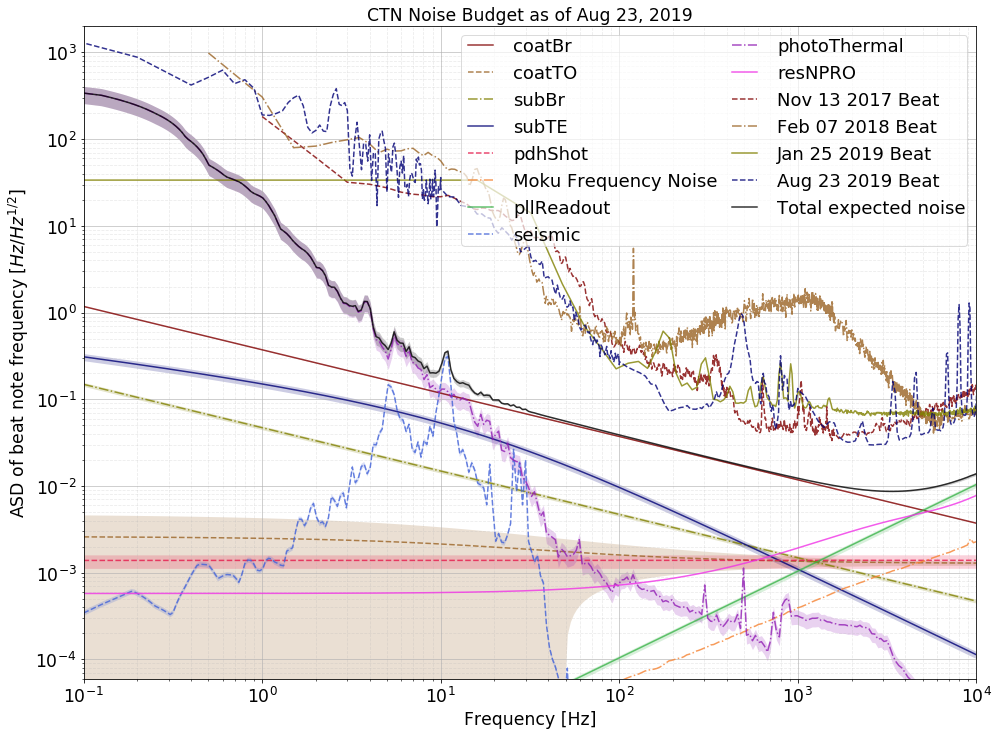

In [9]:
toPlot = ['coatBr', 'coatTO', 'subBr', 'subTE', 'pdhShot', 'pllOsc', 'pllReadout',
          'seismic', 'photoThermal', 'resNPRO', 'Nov1317BN', 'Feb0718BN',
          'Jan2519BN', 'Aug2319BN', 'total']
nbPlot = nosbud.plotPSD(plotList=toPlot, savePlot=False)
nbPlot.gca().set_title('CTN Noise Budget as of Aug 23, 2019')
nbPlot.gca().set_xlim((0.1,1e4))

In [10]:
pp = PdfPages('CTNnoiseBudget_20190823.pdf')
pp.savefig(nbPlot, bbox_inches='tight', pagetype='ledger')
pp.close()